# Cleaning and Analyzing Star Wars Survey Data
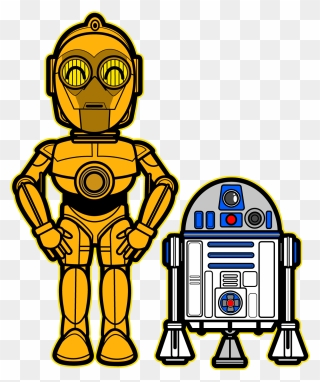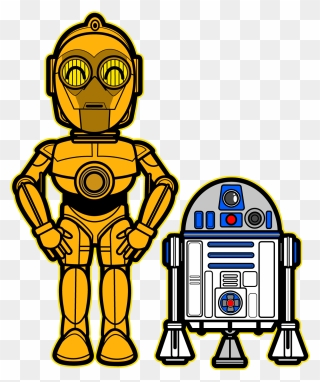

image from [Pin clipart](https://www.pinclipart.com/pins/star-wars/)

## Project Overview

While waiting for Star Wars: The Force Awakens to come out, the team at [FiveThirtyEight](https://fivethirtyeight.com/features/americas-favorite-star-wars-movies-and-least-favorite-characters/) became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch? This question, led to the aggregation of data from Star Wars fans using Survey Monkey. The team received 835 responses.

What **I** will be doing is cleaning the data and answer the follwing questions:
- Which movie do Star Wars fans think is the greatest Star Wars movie?
    * I want to look at this question from a variety of views: general, by gender
- Which movie was most viewed?
    * I'll look at this question from the following views: general, by gender
    
## Project Workflow
- Pull in data
- Clean data
- Analysis/Visualizations
- Conclusions

### Data Dictionary
The data dictionary is below:

- `RespondentID` — An anonymized ID for the respondent (person taking the survey)
- `Gender` — the respondent's gender
- `Age` — the respondent's age
- `Household Income` — the respondent's income
- `Education` — the respondent's education level
- `Location (Census Region)` — the respondent's location
- `Have you seen any of the 6 films in the Star Wars franchise?` — a Yes or No response
- `Do you consider yourself to be a fan of the Star Wars film franchise?` — a Yes or No response

In [67]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [68]:
# Read in the data
star_wars = pd.read_csv("/Users/drewsdesktop/Desktop/Data Science/DataQuest/Python Data Scientist Path/Data Aggregation:Cleaning/Project/Guided Project_ Star Wars Survey/star_wars.csv", encoding = "ISO-8859-1", delimiter = ',')

In [69]:
# Looking at the data

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [70]:
# Looking at the columns further
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 38 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   RespondentID                                                                                                                                   1186 non-null   int64  
 1   Have you seen any of the 6 films in the Star Wars franchise?                                                                                   1186 non-null   object 
 2   Do you consider yourself to be a fan of the Star Wars film franchise?                                                                          836 non-null    object 
 3   Which of the following Star 

# Transforming Yes/No questions to Booleans
We're doing this because boolean values are generally easier to work with. 

In [71]:
# Create a dictionary to define a mapping for the values in the column
yes_no = {
    "Yes": True,
    "No": False
}

# Designate the columns to perform a transformation on
cols = ["Have you seen any of the 6 films in the Star Wars franchise?", "Do you consider yourself to be a fan of the Star Wars film franchise?"]

# Use a for loop to pass the transformation on the columns
for c in cols:
    star_wars[c] = star_wars[c].map(yes_no)

# Checking if the transformation worked
star_wars.head()


,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


# Transforming the check question 

It looks like the transformation worked out alright. Next we're going to perform a transformation on the answers to check question: Which of the following Star Wars films have you seen? Please select all that apply. The two transformations that we'll do:
- Change the values into booleans
- Rename the names of the columns

We'll do this by passing in a dictionary as a mapper and using the map function to apply it across the columns. 

In [72]:
# Creating a mapping dictionary to reassign values
movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

# For loop that converts movie names to a boolean value using the mapping dictionary created
for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)
    
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [73]:
# Renaming the columns so the names are easier to understand, seen will indicate the movie wa sseen

star_wars = star_wars.rename(columns = {
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4": "seen_2",
    "Unnamed: 5": "seen_3",
    "Unnamed: 6": "seen_4",
    "Unnamed: 7": "seen_5",
    "Unnamed: 8": "seen_6"
})

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Recap
So what I did was to rename the columns at index 3:8 something more intuitive. I named them `seen_n` with  standing for the number of the movie they've seen. There are six star wars movies, so there are six `seen_n` values.

# Cleaning the ratings columns
The next six columns in the dataset have ratings for each survey respondents opinion on the best Star Wars movie from a scale of 1-6, and NaN being a potential value as well. The values for these columns currently are a string of a numerical value. So the cleaning process will be:
- Rename the columns to something more intuitive like `ranking_1`.
- Convert the values for each column to a numeric value. 


In [74]:
# Converting the columns to a numeric types
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [75]:
star_wars = star_wars.rename(columns = {
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
    "Unnamed: 10": "ranking_2",
    "Unnamed: 11": "ranking_3",
    "Unnamed: 12": "ranking_4",
    "Unnamed: 13": "ranking_5",
    "Unnamed: 14": "ranking_6"
})

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


It looks like those transformations were successful as well. We now have columns named with the string `ranking_n` where n stands for the number of movie in chronological order and each column values in float form. 

# Finding the highest rated movie amongst survey responses
Next, now that the columns are cleaned, we can find the highest-rated movie amongst fans quicker. We can do this by taking the mean rating for each column. 

In [76]:
# Calculating the mean ranking for each ranking column
mean_sw = star_wars[star_wars.columns[9:15]].mean()
print(mean_sw)

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64


## Observations
Looking at the rankings for each column, it looks as though the 3rd movie, (Star Wars: Episode V The Empire Strikes Back) was the highest rated movie. **It's important to note that the best rating is the rating with the lowest score (1 is the highest rated movie), so a lower mean score means a higher rated movie.** Next, let's make a quick visualization to further look at this. 

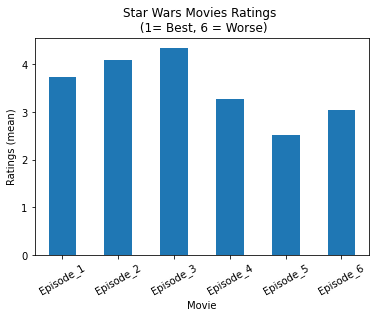

In [77]:
# Plotting the means

# Generating names for each tick
tick_names = []
for i in range(1,7):
    tick_names.append('Episode_{}'.format(i)) #Define the tick names

# Generating the plot
mean_sw.plot.bar(rot=30)
plt.xticks(ticks=range(0,6), labels=tick_names)
plt.xlabel('Movie')
plt.ylabel('Ratings (mean)')

plt.title('Star Wars Movies Ratings \n (1= Best, 6 = Worse)')
plt.show()

## Observations
We've cleaned up the data and computed the average ranking for each movie. It looks like the original movies are rated higher than the new ones. The next thing we can do is measure the overall reception of each movie, by determing how many people have seen each movie. 

# Calculating how many people have seen each movie

In [78]:
# Calculating how many people have seen each movie
sum_sw = star_wars[star_wars.columns[3:9]].sum()
print(sum_sw)

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64


It looks like most people have seen the originals, with the exception of the of the first release of the newer movies. Let's visualize this so that we can be sure.  

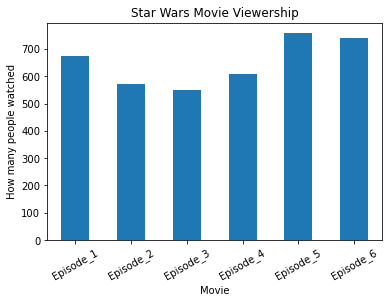

In [79]:
# Visualizing the total number of people who have seen each movie

# Generating names for each tick
tick_names = []
for i in range(1,7):
    tick_names.append('Episode_{}'.format(i)) #Define the tick names

# Generating the plot
sum_sw.plot.bar(rot=30)
plt.xticks(ticks=range(0,6), labels=tick_names)
plt.xlabel('Movie')
plt.ylabel('How many people watched')

plt.title('Star Wars Movie Viewership')
plt.show()

## Observations
- It looks like the finale movies of the Series along with the first release of the newer ones were the most viewed movies, as we suspected from the data earlier.
- The finale of the series were largely considered to be the best movies. However, the first movie has many viewers because this was the reintroduction of Star Wars mania. There had been a long since the final original was released, so natuarlly a reboot was going to be watched quite a bit. 

# Determining favorite movies by gender


In [80]:
# Subsetting the dataframes by gender
male = star_wars[star_wars["Gender"] == "Male"]
female = star_wars[star_wars["Gender"] == "Female"]

male.head()
female.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
111,3291439708,True,True,True,True,False,False,True,True,1.0,...,Somewhat favorably,Greedo,Yes,No,Yes,Female,> 60,"$50,000 - $99,999",Bachelor degree,South Atlantic
112,3291439404,True,False,True,False,False,False,False,False,1.0,...,Somewhat favorably,I don't understand this question,No,NaN,No,Female,> 60,"$25,000 - $49,999",Graduate degree,Pacific
114,3291435787,True,False,True,False,False,False,True,True,3.0,...,Somewhat favorably,I don't understand this question,No,NaN,No,Female,30-44,"$50,000 - $99,999",Graduate degree,South Atlantic
116,3291433636,True,False,True,True,True,False,True,True,3.0,...,Somewhat unfavorably,I don't understand this question,No,NaN,No,Female,30-44,"$25,000 - $49,999",Bachelor degree,West South Central
117,3291431939,True,True,True,True,True,True,True,True,3.0,...,Very favorably,Han,No,NaN,Yes,Female,30-44,"$25,000 - $49,999",Graduate degree,South Atlantic


# Conducting analysis by gender
We have the dataframe split up by gender. I'm going to conduct a similar analysis to what we did before by `Gender`.

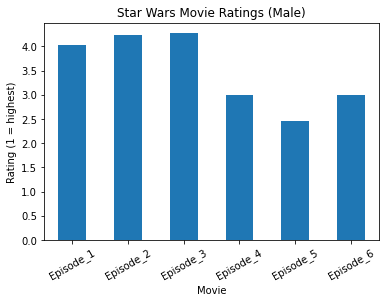

In [81]:
# Male Star Wars fans highest ranked movies
male_mean =  male[male.columns[9:15]].mean()

# Generating the tick names
tick_names = []
for i in range(1,7):
    tick_names.append('Episode_{}'.format(i)) #Define the tick names

# Generating the plot
male_mean.plot.bar(rot=30)
plt.xticks(ticks=range(0,6), labels=tick_names)
plt.xlabel('Movie')
plt.ylabel('Rating (1 = highest)')

plt.title('Star Wars Movie Ratings (Male)')
plt.show()

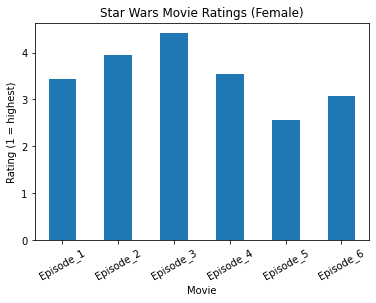

In [82]:
# Female Star Wars fans highest ranked movies
female_mean =  female[female.columns[9:15]].mean()

# Generating the tick names
tick_names = []
for i in range(1,7):
    tick_names.append('Episode_{}'.format(i)) #Define the tick names

# Generating the plot
female_mean.plot.bar(rot=30)
plt.xticks(ticks=range(0,6), labels=tick_names)
plt.xlabel('Movie')
plt.ylabel('Rating (1 = highest)')

plt.title('Star Wars Movie Ratings (Female)')
plt.show()

## Looking at Male vs. Female Star Wars ratings

- It looks like the original movies were highest rated among males. Not that surprising.
- It looks like females rated the the originals higher as well. They follow a similar pattern to the males rankings.

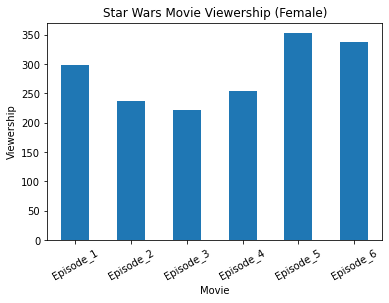

In [83]:
# Female Star Wars fans most viewed movies
female_sum = female[female.columns[3:9]].sum()

# Generating the tick names
tick_names = []
for i in range(1,7):
    tick_names.append('Episode_{}'.format(i)) #Define the tick names
    
# Generating the plot

female_sum.plot.bar(rot=30)
plt.xticks(ticks=range(0,6), labels=tick_names)
plt.xlabel('Movie')
plt.ylabel('Viewership')

plt.title('Star Wars Movie Viewership (Female)')
plt.show()

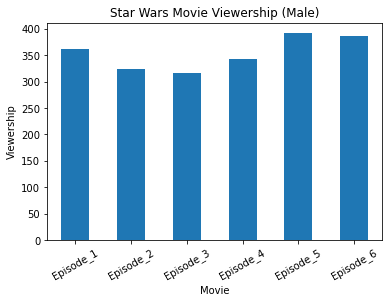

In [84]:
# Male Star Wars fans most viewed movies
male_sum = male[male.columns[3:9]].sum()

# Generating the tick names
tick_names = []
for i in range(1,7):
    tick_names.append('Episode_{}'.format(i)) #Define the tick names
    
# Generating the plot

male_sum.plot.bar(rot=30)
plt.xticks(ticks=range(0,6), labels=tick_names)
plt.xlabel('Movie')
plt.ylabel('Viewership')

plt.title('Star Wars Movie Viewership (Male)')
plt.show()

## Female vs. Male Viewership
- It looks like the finale movies were the most viewed movies for both. 
- One interesting takeaway is that less females watched the reboot movies, but they enjoyed them much more than males did.


# Conclusion
- We found that the most popular Star Wars movies tended to be the classic ones in terms of ratings.
- The most viewed Star Wars movies were the 5th, 6th, and 1st one in chronological order of the Series. 
- Men tended to watch newer movies more, but women enjoyed them more. 

## Possible next steps
- Further Analysis could be done by exploring how educational background, location, and age demographics interact with ratings and viere
